# Case Study - Clustering Method --> Procesing Unlabelled Data




K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. I have used `Iris` dataset for this project. I implement K-Means clustering to find intrinsic groups within this dataset that display the same `Iris-setosa` characteristics. The `Iris-setosa` behaviour variable consists of different types of flowers ('Iris-setosa', 'Iris-versicolor' and 'Iris-virginica').

## What You Will Learn

1.	Introduction to K-Means Clustering
2.	K-Means Clustering intuition
3.	Choosing the value of K
4.	The elbow method
5.	The problem statement
6.	Dataset description
7.	Import libraries
8.	Import dataset
9.	Exploratory data analysis
10.	Declare feature vector and target variable
11.	Convert categorical variable into integers
12.	Feature scaling
13.	K-Means model with two clusters
14.	K-Means model parameters study
15.	Check quality of weak classification by the model
16.	Use elbow method to find optimal number of clusters
17.	K-Means model with different clusters
18.	Results and conclusion


## 1. Introduction to K-Means Clustering


Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

**K-Means clustering** is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.


## 2. K-Means Clustering intuition


K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.


**Centroid** - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.
K-Means clustering works as follows:-
The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-


**1. Data assignment step**


Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.



**2. Centroid update step**


In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.


The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached.
This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.


## 3. Choosing the value of K


The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the **elbow method** which is described below.


## 4. The elbow method


The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

If K increases, average distortion will decrease.  Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.


## 5. Dataset description

The Iris dataset contains the measurements of 150 iris flowers from three different species: Setosa, Versicolor, and Viriginica.
Each flower sample represents one row in our data set, and the flower measurements in centimetres are stored as columns, which we also call the features of the dataset.


# **Program for Self Assessment**

## 7. Import libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ignore warnings


In [82]:
import warnings

warnings.filterwarnings('ignore')

## 8. Import dataset


In [83]:
data = 'https://raw.githubusercontent.com/samariwa/artificial-intelligence-projects/refs/heads/main/iris.data'

df = pd.read_csv(data)


## 9. Exploratory data analysis

### Check shape of the dataset

In [84]:
df.shape

(149, 5)

We can see that there are 149 instances and 5 attributes in the dataset. In the dataset description, it is given that there are 149 instances and 5 attributes in the dataset.

### Preview the dataset

In [85]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### View summary of dataset

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Check for missing values in dataset

In [87]:
df.isnull().sum()

,0
5.1,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

### Drop redundant columns

### Again view summary of dataset

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Now, we can see that redundant columns have been removed from the dataset.

We can see that, there are 3 character variables (data type = object) and remaining 9 numerical variables (data type = int64).


### View the statistical summary of numerical variables

In [89]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are 3 categorical variables in the dataset. I will explore them one by one.

### Explore `status_id` variable

### Explore `status_published` variable

In [90]:
# view the labels in the variable

df['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [91]:
# view how many different types of variables are there

len(df['Iris-setosa'].unique())

3

Again, we can see that there are 6913 unique labels in the `status_published` variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it also.

### Explore `status_type` variable

In [92]:
# view the labels in the variable

df['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [93]:
# view how many different types of variables are there

len(df['Iris-setosa'].unique())

3

We can see that there are 4 categories of labels in the `status_type` variable.

### Drop `Iris-setosa` variable from the dataset

In [94]:
y = df['Iris-setosa']
df.drop(['Iris-setosa'], axis=1, inplace=True)

### View the summary of dataset again

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5.1     149 non-null    float64
 1   3.5     149 non-null    float64
 2   1.4     149 non-null    float64
 3   0.2     149 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Preview the dataset again

In [96]:
df.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


We can see that there is 1 non-numeric column `status_type` in the dataset. I will convert it into integer equivalents.

## 10. Declare feature vector and target variable

In [97]:
X = df

## 11. Convert categorical variable into integers

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

### View the summary of X

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5.1     149 non-null    float64
 1   3.5     149 non-null    float64
 2   1.4     149 non-null    float64
 3   0.2     149 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Preview the dataset X

In [100]:
X.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


## 12. Feature Scaling

In [101]:
cols = X.columns

In [102]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [103]:
X = pd.DataFrame(X, columns=[cols])

In [104]:
X.head()

,5.1,3.5,1.4,0.2
0,0.166667,0.416667,0.067797,0.041667
1,0.111111,0.500000,0.050847,0.041667
2,0.083333,0.458333,0.084746,0.041667
3,0.194444,0.666667,0.067797,0.041667
4,0.305556,0.791667,0.118644,0.125000


## 13. K-Means model with two clusters

In [105]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

## 14. K-Means model parameters study

In [106]:
kmeans.cluster_centers_

array([[0.19557823, 0.59013605, 0.07886544, 0.06037415],
       [0.545     , 0.36333333, 0.6620339 , 0.65666667]])

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as **inertia**, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.


- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster **centroids**.


- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

### Inertia


- **Inertia** is not a normalized metric.

- The lower values of inertia are better and zero is optimal.

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of `curse of dimensionality`).

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can calculate model inertia as follows:-

In [107]:
kmeans.inertia_

12.141338353332117

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.

 ## 15. Check quality of weak classification by the model

In [108]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


Result: 99 out of 149 samples were correctly labeled.


In [109]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.66


We have achieved a weak classification accuracy of 1% by our unsupervised model.

## 16. Use elbow method to find optimal number of clusters

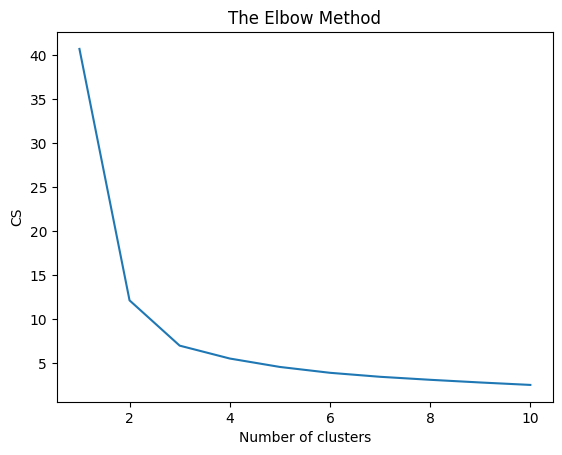

In [110]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


- By the above plot, we can see that there is a kink at k=2.

- Hence k=2 can be considered a good number of the cluster to cluster this data.

- But, we have seen that I have achieved a weak classification accuracy of 1% with k=2.

- I will write the required code with k=2 again for convinience.

In [111]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 99 out of 149 samples were correctly labeled.
Accuracy score: 0.66


So, our weak unsupervised classification model achieved a very weak classification accuracy of 1%.

I will check the model accuracy with different number of clusters.

## 17. K-Means model with different clusters

### K-Means model with 3 clusters

In [112]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 36 out of 149 samples were correctly labeled.
Accuracy score: 0.24


### K-Means model with 4 clusters

In [113]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 29 out of 149 samples were correctly labeled.
Accuracy score: 0.19


We have achieved a relatively high accuracy of 62% with k=4.

# *Overall summary**


1.	In this project, I have implemented the most popular unsupervised clustering technique called **K-Means Clustering**.

2.	I have applied the elbow method and find that k=2 (k is number of clusters) can be considered a good number of cluster to cluster this data.

3.	I have find that the model has very high inertia of 237.7572. So, this is not a good model fit to the data.

4.	I have achieved a weak classification accuracy of 1% with k=2 by our unsupervised model.

5.	So, I have changed the value of k and find relatively higher classification accuracy of 62% with k=4.

6.	Hence, we can conclude that k=4 being the optimal number of clusters.
